In [121]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import datasets, linear_model
from scipy import optimize

import matplotlib as mpl
import matplotlib.dates as dates
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

** TODOS **

* How to plot the decision boundary in 3-d space

**Problem**: Determine each applicant's chance of admission based on their results on two exams.

**Given**: For each training example, you have the applicant's scores on two exams and the admissions decision.

# 1. Logistic Regression

Revision:

Hypothesis:

$$h_{\theta}(x)=g(\theta^{T}x)$$

Sigmoid function:

$$g(z)=\frac{1}{1+e^{-z}}$$

Partial Derivative:

$$\frac{\partial}{\partial\theta_{(j)}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^i)x_j^i$$

Cost Function

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)}))-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))]$$

In [154]:
debug = False
%precision %.4g
np.set_printoptions(suppress=True)

## 1. Load the data

In [155]:
path = 'exercises/data/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['exam1','exam2','decision'])

In [156]:
data.head()

,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 2. Visualize the data

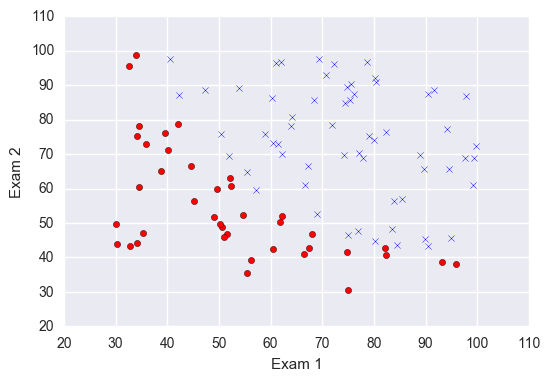

In [157]:
dec0 = data[data['decision']==0]
dec1 = data[data['decision']==1]

fig, ax = plt.subplots()
plt.scatter(x=dec0['exam1'], y=dec0['exam2'], c='r', marker='o',label='decision')  
plt.scatter(x=dec1['exam1'], y=dec1['exam2'], c='b', marker='x',label='decision') 
ax.set_xlabel('Exam 1')  
ax.set_ylabel('Exam 2') 

## 3. Sigmoid function

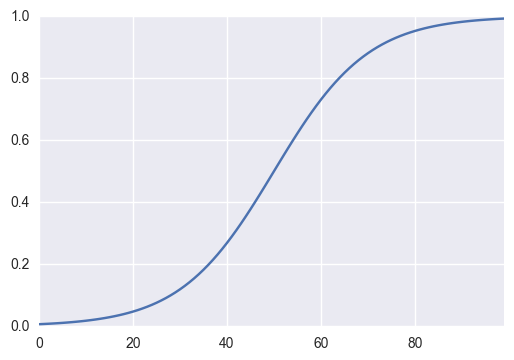

In [161]:
def sigmoid(z):
    return (1.0 / ( 1.0 + np.exp(-z)))

df_sig = pd.DataFrame({'in':np.arange(-5,5,0.1)})
df_sig['in'].apply(lambda x: sigmoid(x)).plot()


## 4. Cost function
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)}))-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))]$$

In [162]:
debug = False
def computeCost(theta, X, y):
    if debug:
        print("shape of X", X.shape)
        print("shape of y", y.shape)
        print("shape of theta", theta.shape)
        print("size of y", y.size)

    l = -y * (np.log(sigmoid(X.dot(theta))))
    if debug:
        print("Shape of l: ", l.shape)
    r = (1.0 - y) * (np.log(1.0 - (sigmoid(X.dot(theta)))))
    if debug:
        print("Shape of r: ", r.shape)
    inner = l-r
    if debug:
        print("inner is ", np.sum(inner))
    return (np.sum(inner) / (y.size))

## 4. Gradient function

$$\frac{\partial}{\partial\theta_{(j)}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^i)x_j^i$$

Repeat from j = 0 to n:
$$\theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial\theta_{j}}J(\theta)$$

$$\theta_{j} := \theta_{j} - \alpha \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

Where:

$h_{\theta}(x)=g(\theta^{T}x)$


### 4.1 Matrix Notation

The Gradient Descent rule can be expressed as:

$$\theta := \theta - \alpha \nabla J(\theta)$$

Where ∇J(θ) is a column vector of the form:


$$\nabla J(\theta)  = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0}   \newline \frac{\partial J(\theta)}{\partial \theta_1}   \newline \vdots   \newline \frac{\partial J(\theta)}{\partial \theta_n} \end{bmatrix}$$


The j-th component of the gradient is the summation of the product of two terms:

\begin{align*}
\; &\frac{\partial J(\theta)}{\partial \theta_j} &=&  \frac{1}{m} \sum\limits_{i=1}^{m}  \left(h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} \newline
\; & &=& \frac{1}{m} \sum\limits_{i=1}^{m}   x_j^{(i)} \cdot \left(h_\theta(x^{(i)}) - y^{(i)}  \right) 
\end{align*}



Sometimes, the summation of the product of two terms can be expressed as the product of two vectors.

Here, $x_j^{(i)}$, for i = 1,...,m, represents the m elements of the j-th column, $\vec{x_j}$, of the training set X.

The other term $\left(h_\theta(x^{(i)}) - y^{(i)}  \right)$ is the vector of the deviations between the predictions $h_\theta(x^{(i)})$ and the true values $y^{(i)}$. 

Re-writing $\frac{\partial J(\theta)}{\partial \theta_j}$, we have:


\begin{align*}\; &\frac{\partial J(\theta)}{\partial \theta_j} &=& \frac1m  \vec{x_j}^{T} (X\theta - \vec{y}) \newline\newline\newline\; &\nabla J(\theta) & = & \frac 1m X^{T} (X\theta - \vec{y}) \newline\end{align*}


Finally, the matrix notation (vectorized) of the Gradient Descent rule is:

$$\theta := \theta - \frac{\alpha}{m} X^{T} (X\theta - \vec{y})$$


In [164]:
def computeGrad(theta, X, y, lbda=1):
    grad = np.zeros(theta.size)
    
    inner = sigmoid(X.dot(theta)) - y
    
    for i in range(grad.size):
        term = inner * np.array(X.iloc[:,i])
        grad[i] = (np.sum(term) / len(X))  
    return grad

def p_s(str_p, p):
    print ("Shape of ", str_p, " : ", p.shape)
    


## Test cost function using Theta = [0]
Should be **0.69314718055994529**


In [165]:
X = data[['exam1','exam2']] 
X.insert(0, 'x0', 1)

y = data['decision']             # Output from sample  (profit)

# Compute cost when theta is 0
c1 = computeCost( np.array([0,0,0]), X, y)

print("Cost with theta (0, 0) = ",c1)

Cost with theta (0, 0) =  0.69314718056


## 5. Use fminunc equivalent in python
From net: 
>I was also trying to implement logistic regression as discussed in Coursera ML course, but in python. I found scipy helpful. After trying different algorithm implementations in minimize function, I found Newton Conjugate Gradient as most helpful. Also After examining its returned value, it seems that it is equivalent to that of fminunc in Octave.

Scipy vs Sklearn
> Scipy provides low-level mathematical and scientific functions.
scikit-learn provides high-level machine learning functions.

Various Optimization functions available in scipy: https://docs.scipy.org/doc/scipy-0.10.0/reference/optimize.html#module-scipy.optimize

### Find out Theta
You should see that the cost is about : **0.203**

In [166]:
p_s("X1", X)
p_s("y", y)

theta = np.zeros(3)

p_s("theta", theta)
computeGrad(theta, X, y, 1)

opt_result = optimize.fmin_tnc(func=computeCost, x0=theta, fprime=computeGrad, args=(X, y))
theta = opt_result[0]
print("Theta using optimize is : ", theta)

c2 = computeCost( theta, X, y)
print("Cost of Theta(using TNC): ", c2)

Shape of  X1  :  (100, 3)
Shape of  y  :  (100,)
Shape of  theta  :  (3,)
Theta using optimize is :  [-25.16131866   0.20623159   0.20147149]
Cost of Theta(using TNC):  0.203497701589


## 6. Use Theta to plot the decision boundary
**Notes**:

Our final hypothesis y = $h_{\theta}(x)=g(\theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2})$ is in 3-d space of the form $z = f(x,y)$ (leaving out $x_{0}$)

So to plot the decision we need **3-d space**.. $x_{1}$, $x_{2}$ and $y$

* In python, to plot such functions we need to use meshgrid (https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)


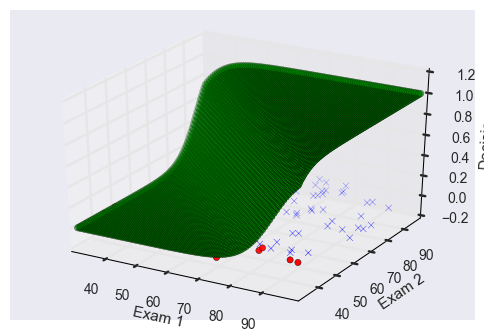

In [171]:
x_min, x_max = X['exam1'].min(), X['exam1'].max()
y_min, y_max = X['exam2'].min(), X['exam2'].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Our final hypothesis is y = Theta0 * X0 + Theta1 * X1 + Theta2 * X2
Z = sigmoid(theta[0] + xx * theta[1] + yy * theta[2])


#Z = sigmoid(X.dot(theta))
#print(X.shape)
#print(Z.shape)
#print(xx.shape)
Z = Z.reshape(xx.shape)
#print(Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot()
#plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

#h = plt.contourf(xx,yy,z)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(x=dec0['exam1'], y=dec0['exam2'], c='r', marker='o',label='decision')  
plt.scatter(x=dec1['exam1'], y=dec1['exam2'], c='b', marker='x',label='decision') 
ax.scatter(xx, yy, Z, c='green', label='decision') 

ax.set_xlabel('Exam 1')  
ax.set_ylabel('Exam 2')
ax.set_zlabel('Decision')


## 7. Use the model to predict
For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
you should expect to see an admission probability of **0.776**

In [172]:
input_X = np.array([1,45,85])
predict = sigmoid(input_X.dot(theta))
predict

0.7762906

## 8. See how well the learned model predicts on our training set

*************************************************************************

# 2. Using sklearn to predict

Theta should be :  [-25.16131866,    0.20623159,    0.20147149]
Cost(using TNC) should be : 0.203497701589



********************************************

In [263]:
regr = linear_model.LogisticRegression(C=1, fit_intercept=True)
X_orig = data[['exam1','exam2']] 
regr.fit(X_orig, y)
print("Theta0 intercept ", regr.intercept_ )
print("Theta: ", regr.coef_)

sklearn_theta = regr.coef_
sklearn_theta = np.hstack((regr.intercept_,sklearn_theta[0]))  # In [Theta0, Theta1] format

sklearnCost = computeCost(X_orig.ix[:,0:2].as_matrix(), y.reshape(-1,1), sklearn_theta.reshape(-1,1))

#c_sklearn = computeCost( sklearn_theta, X_orig, y)
print("Cost of Theta(using sklearn): ", sklearnCost)

Theta0 intercept  [-3.89977794]
Theta:  [[ 0.03844482  0.03101855]]


ValueError: shapes (100,1) and (100,2) not aligned: 1 (dim 1) != 100 (dim 0)


# 3. Regularized logistic regression

In [52]:
path2 = 'exercises/data/ex2data2.txt'
data2 = pd.read_csv(path2, header=None, names=['test1','test2','decision'])
data2.head()

,test1,test2,decision
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


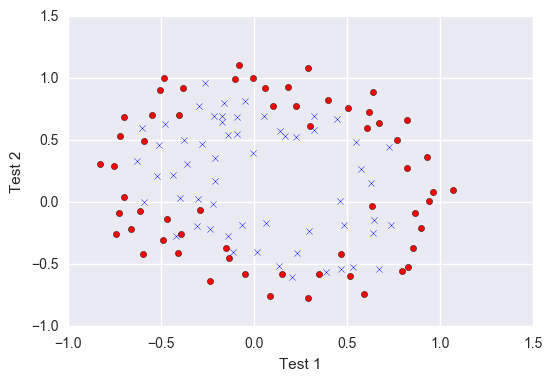

In [53]:
dec0 = data2[data2['decision']==0]
dec1 = data2[data2['decision']==1]

eqx = np.arange(1,100,0.5)
fig, ax = plt.subplots()
plt.scatter(x=dec0['test1'], y=dec0['test2'], c='r', marker='o',label='decision')  
plt.scatter(x=dec1['test1'], y=dec1['test2'], c='b', marker='x',label='decision') 
ax.set_xlabel('Test 1')  
ax.set_ylabel('Test 2') 

In [58]:
def featureMapping(dataX):
    degree = 6
    x1 = dataX.iloc[:,0]
    x2 = dataX.iloc[:,1]
    if debug:
        print(x1.head())
        print(x2.head())
    m = dataX.shape[0]
    #g = pd.DataFrame()
    zeroth_col = [np.ones(m)]
    #g['ones'] = np.ones(m)
    for i in range(1,degree+1):
        for j in range(0,i+1):
            zeroth_col.append((x1 ** (i - j)) * (x2 ** j))
            #g['%f,%f'.format(i-j,j)] = (x1 ** (i - j)) * (x2 ** j)
    #print("shape: ",zeroth_col.shape)
    #print("zeroth: ",zeroth_col)
    #print(g)
    return np.vstack(zeroth_col).T
    

In [59]:
debug = False
newX = featureMapping(data2)
if debug:
    l,w = newX.shape
    #print("After feature mapping new dimension : ")
    #print(str(l) + "," + str(w))
newX_df = pd.DataFrame(newX)
newX_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 2.1 Cost function (regularized)

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)}))-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

In [109]:

debug = True
def computeCostReg2(theta, X, y, lmbda):
    if debug:
        print("shape of X", X.shape)
        print("shape of y", y.shape)
        print("shape of theta", theta.shape)
        print("size of y", y.size)

    l = -y * (np.log(sigmoid(X.dot(theta))))
    if debug:
        print("Shape of l: ", l.shape)
    r = (1.0 - y) * (np.log(1.0 - (sigmoid(X.dot(theta)))))
    if debug:
        print("Shape of r: ", r.shape)
    inner = l-r
    if debug:
        print("inner is ", np.sum(inner))
    #print("Shape of l: ",(np.sum(inner) / (y.size)).shape)
    #print("Shape of r: ",(((l/(2*y.size)) * sum(theta[1:] ** 2))).shape)
    return ((np.sum(inner) / (y.size)) + ((lmbda/(2*y.size)) * sum(theta[1:] ** 2)))



In [139]:
def computeGradReg(theta, X, y, lbda):
    grad = np.zeros(theta.size)
    
    inner = sigmoid(X.dot(theta)) - y
    
    #print(theta.shape)
    #print("Shape of grad:" , grad.shape)
    #print("Shape of inner:" , inner.shape)
    
    for i in range(grad.size):
        term = inner * np.array(X.iloc[:,i])
        #print("Shape of term:" , term.shape)
        if i == 0:
            grad[i] = (np.sum(term) / len(X))  
        else:
            grad_tmp = (np.sum(term) / len(X)) 
            grad[i] = grad_tmp + ((lbda/y.size) * theta[i])
    return grad


In [140]:

initial_theta2 = np.zeros(28)

#c1 = computeCost( np.array([0,0,0]), X, y)

y2 = data2.iloc[: , 2]
test  = computeCostReg2(initial_theta2, newX, y2, 55.0)
print(test)


0.69314718056


In [211]:
#X2 = data2[['test1','test2']] 
#X2.insert(0, 'x0', 1)

y2 = data2['decision'] 

p_s("newX", newX)
p_s("y2", y2)

theta2 = np.zeros(28)

p_s("theta2", theta2)
result = computeGradReg(theta2, newX_df, y2, 1.0)

print("theta is ", result)
opt_result = optimize.fmin_tnc(func=computeCostReg, x0=theta2, fprime=computeGradReg, args=(newX_df, y2, 1))
theta2 = opt_result[0]
print("Theta using optimize is : ", theta2)

c2 = computeCostReg2(result, newX_df, y2, 1.0)
print("Cost of Theta2(using TNC): ", c2)

Shape of  newX  :  (118, 28)
Shape of  y2  :  (118,)
Shape of  theta2  :  (28,)
theta is  [ 0.00847458  0.01878809  0.00007777  0.05034464  0.01150133  0.03766485
  0.01835599  0.00732393  0.00819244  0.02347649  0.03934862  0.00223924
  0.01286005  0.00309594  0.03930282  0.01997075  0.00432983  0.00338644
  0.00583822  0.00447629  0.03100798  0.03103124  0.0010974   0.00631571
  0.0004085   0.00726504  0.00137646  0.03879364]
Theta using optimize is :  [ 1.27271027  0.62529965  1.18111686 -2.01987399 -0.91743189 -1.43166929
  0.12393227 -0.36553118 -0.35725404 -0.17516292 -1.4581701  -0.05098418
 -0.61558554 -0.27469165 -1.19271298 -0.2421784  -0.20603299 -0.04466178
 -0.27778951 -0.29539514 -0.45645982 -1.04319155  0.02779373 -0.2924487
  0.0155576  -0.32742405 -0.1438915  -0.92467487]
Cost of Theta2(using TNC):  0.706892556654


xx2 shape: (28, 28)
yy2 shape: (28, 28)
Z shape: (28, 28)
Z shape after reshape: (28, 28)


AttributeError: 'AxesSubplot' object has no attribute 'set_zlabel'

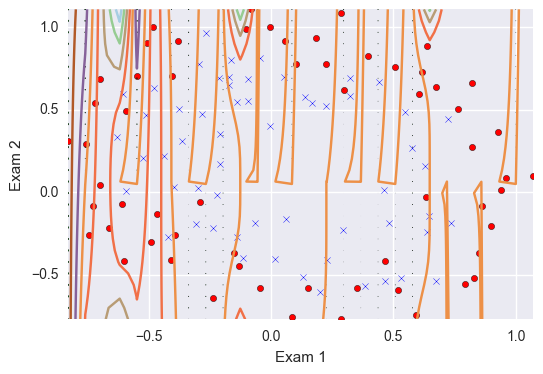

In [221]:
x_min2, x_max2 = data2['test1'].min(), data2['test1'].max()
y_min2, y_max2 = data2['test2'].min(), data2['test2'].max()

xx2, yy2 = np.meshgrid(np.linspace(x_min2, x_max2, 28),
                     np.linspace(y_min2, y_max2, 28))


print("xx2 shape:", xx2.shape)
print("yy2 shape:", yy2.shape)

plotX = pd.DataFrame({'test1': xx2[0], 'test2': yy2[0]})
#plotX['test1'] = np.array(xx2)
#plotX['test2'] = yy2
#print(theta2)
Z = featureMapping(plotX) * theta2

print("Z shape:", Z.shape)
#print("yy2 shape:", yy2.shape)

#Z

Z = Z.reshape(xx2.shape)
print("Z shape after reshape:", Z.shape)
#print("Z is : ",Z)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax = fig.add_subplot()
plt.contour(xx2, yy2, Z, cmap=plt.cm.Paired)

#h = plt.contourf(xx,yy,z)

plt.xlim(xx2.min(), xx2.max())
plt.ylim(yy2.min(), yy2.max())

dec0 = data2[data2['decision']==0]
dec1 = data2[data2['decision']==1]

plt.scatter(x=dec0['test1'], y=dec0['test2'], c='r', marker='o',label='decision')  
plt.scatter(x=dec1['test1'], y=dec1['test2'], c='b', marker='x',label='decision') 
ax.scatter(xx2, yy2, Z, c='green', label='decision') 

ax.set_xlabel('Exam 1')  
ax.set_ylabel('Exam 2')
ax.set_zlabel('Decision')
